In [ ]:
# pip install mne pyedflib h5py numpy pandas matplotlib
# this libraries required for EDF file reading and processing

In [5]:
import pyedflib
import glob

# Get list of EDF files
edf_files = glob.glob("Drowsiness-Signal/*.edf")
print(f"Found {len(edf_files)} EDF files.")

for file in edf_files:
    print(f"Processing file: {file}")



Found 40 EDF files.
Processing file: Drowsiness-Signal\01M_1.edf
Processing file: Drowsiness-Signal\01M_1_annotations.edf
Processing file: Drowsiness-Signal\01M_2.edf
Processing file: Drowsiness-Signal\01M_2_annotations.edf
Processing file: Drowsiness-Signal\02F_1.edf
Processing file: Drowsiness-Signal\02F_1_annotations.edf
Processing file: Drowsiness-Signal\02F_2.edf
Processing file: Drowsiness-Signal\02F_2_annotations.edf
Processing file: Drowsiness-Signal\03F_1.edf
Processing file: Drowsiness-Signal\03F_1_annotations.edf
Processing file: Drowsiness-Signal\03F_2.edf
Processing file: Drowsiness-Signal\03F_2_annotations.edf
Processing file: Drowsiness-Signal\04M_1.edf
Processing file: Drowsiness-Signal\04M_1_annotations.edf
Processing file: Drowsiness-Signal\04M_2.edf
Processing file: Drowsiness-Signal\04M_2_annotations.edf
Processing file: Drowsiness-Signal\05M_1.edf
Processing file: Drowsiness-Signal\05M_1_annotations.edf
Processing file: Drowsiness-Signal\05M_2.edf
Processing file: 

In [6]:

# Inspect the first file
file_path = edf_files[0]
f = pyedflib.EdfReader(file_path)

n_signals = f.signals_in_file
signal_labels = f.getSignalLabels()
sample_frequencies = [f.getSampleFrequency(i) for i in range(n_signals)]

print("File:", file_path)
print("Number of signals:", n_signals)
print("Signal labels:", signal_labels)
print("Sampling frequencies:", sample_frequencies)

# Read one signal (e.g., first EEG channel)
signal = f.readSignal(0)
print("Signal shape:", signal.shape)

f.close()



File: Drowsiness-Signal\01M_1.edf
Number of signals: 7
Signal labels: ['O1-Ref', 'O2-Ref', 'C3-Ref', 'C4-Ref', 'LOC-Ref', 'ROC-Ref', 'EKG']
Sampling frequencies: [128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0]
Signal shape: (935040,)


In [8]:
signal_shapes = []

# Loop through each EDF file
for file_path in edf_files:
    try:
        f = pyedflib.EdfReader(file_path)

        n_signals = f.signals_in_file
        signal_labels = f.getSignalLabels()
        sample_frequencies = [f.getSampleFrequency(i) for i in range(n_signals)]

        print(f"\nFile: {file_path}")
        print("Number of signals:", n_signals)
        print("Signal labels:", signal_labels)
        print("Sampling frequencies:", sample_frequencies)

        # Read one signal (e.g., first EEG channel)
        signal = f.readSignal(0)
        print("Signal shape:", signal.shape)
        signal_shapes.append(signal.shape)

        f.close()
    except Exception as e:
        print(f"Failed to process {file_path}: {e}")


File: Drowsiness-Signal\01M_1.edf
Number of signals: 7
Signal labels: ['O1-Ref', 'O2-Ref', 'C3-Ref', 'C4-Ref', 'LOC-Ref', 'ROC-Ref', 'EKG']
Sampling frequencies: [128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0]
Signal shape: (935040,)

File: Drowsiness-Signal\01M_1_annotations.edf
Number of signals: 0
Signal labels: []
Sampling frequencies: []
Failed to process Drowsiness-Signal\01M_1_annotations.edf: Trying to access channel 0, but only 0 channels found

File: Drowsiness-Signal\01M_2.edf
Number of signals: 7
Signal labels: ['O1-Ref', 'O2-Ref', 'C3-Ref', 'C4-Ref', 'LOC-Ref', 'ROC-Ref', 'EKG']
Sampling frequencies: [128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0]
Signal shape: (931200,)

File: Drowsiness-Signal\01M_2_annotations.edf
Number of signals: 0
Signal labels: []
Sampling frequencies: []
Failed to process Drowsiness-Signal\01M_2_annotations.edf: Trying to access channel 0, but only 0 channels found

File: Drowsiness-Signal\02F_1.edf
Number of signals: 7
Signal labels: ['O1-Re

In [9]:
signal_shapes

[(935040,),
 (931200,),
 (944640,),
 (929280,),
 (935040,),
 (940800,),
 (887040,),
 (923520,),
 (927360,),
 (927360,),
 (923520,),
 (938880,),
 (933120,),
 (931200,),
 (925440,),
 (925440,),
 (925440,),
 (927360,),
 (925440,),
 (927360,)]

In [17]:
for shape in signal_shapes:
    print(shape[0]-(3600*2*128)) # assuming 2 hours of recording at 128 Hz sampling rate

13440
9600
23040
7680
13440
19200
-34560
1920
5760
5760
1920
17280
11520
9600
3840
3840
3840
5760
3840
5760


In [12]:
# Inspecting annotations using MNE
import mne

raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
print(raw.info)  # metadata (channels, duration, sfreq, etc.)

# If annotations exist:
if raw.annotations is not None and len(raw.annotations) > 0:
    print("Annotations found:")
    for ann in raw.annotations:
        print(ann)
else:
    print("No annotations in this file")


<Info | 6 non-empty values
 bads: []
 ch_names: []
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 28.5 Hz
 meas_date: 2001-01-01 15:50:21 UTC
 nchan: 0
 projs: []
 sfreq: 57.0 Hz
 subject_info: <subject_info | his_id: SN20, sex: 0, last_name: X>
>
Annotations found:
OrderedDict([('onset', np.float64(4.0)), ('duration', np.float64(0.0)), ('description', np.str_('Event')), ('orig_time', datetime.datetime(2001, 1, 1, 15, 50, 21, tzinfo=datetime.timezone.utc)), ('extras', {})])


C:\Users\User\AppData\Local\Temp\ipykernel_11556\3582826593.py:4: RuntimeWarning: Omitted 7 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


In [13]:
import mne
import glob
import os

# Get list of all annotation files (those ending with '_annotations.edf')
annotation_files = glob.glob("Drowsiness-Signal/*_annotations.edf")

# Loop through each annotation file
for file_path in annotation_files:
    try:
        # Load the raw EDF file with MNE
        raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
        print(f"\nAnnotation File: {file_path}")
        print(raw.info)  # metadata (channels, duration, sfreq, etc.)

        # Check if annotations exist
        if raw.annotations is not None and len(raw.annotations) > 0:
            print("Annotations found:")
            for ann in raw.annotations:
                print(f"Time: {ann['onset']}, Duration: {ann['duration']}, Label: {ann['description']}")
        else:
            print("No annotations in this file.")

    except Exception as e:
        print(f"Failed to process {file_path}: {e}")



Annotation File: Drowsiness-Signal\01M_1_annotations.edf
<Info | 6 non-empty values
 bads: []
 ch_names: []
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 8.0 Hz
 meas_date: 2001-01-01 14:47:31 UTC
 nchan: 0
 projs: []
 sfreq: 16.0 Hz
 subject_info: <subject_info | his_id: SN1, sex: 0, last_name: X>
>
Annotations found:
Time: 8.0, Duration: 0.0, Label: Event

Annotation File: Drowsiness-Signal\01M_2_annotations.edf
<Info | 6 non-empty values
 bads: []
 ch_names: []
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 28.5 Hz
 meas_date: 2001-01-01 14:52:38 UTC
 nchan: 0
 projs: []
 sfreq: 57.0 Hz
 subject_info: <subject_info | his_id: SN2, sex: 0, last_name: X>
>
Annotations found:
Time: 13.0, Duration: 0.0, Label: Event

Annotation File: Drowsiness-Signal\02F_1_annotations.edf
<Info | 6 non-empty values
 bads: []
 ch_names: []
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 28.5 Hz
 meas_date: 2001-01-01 14:44:00 UTC
 nchan: 0
 projs: []
 sfreq: 57.0 Hz
 subject_info

C:\Users\User\AppData\Local\Temp\ipykernel_11556\1878012220.py:12: RuntimeWarning: Omitted 25 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\User\AppData\Local\Temp\ipykernel_11556\1878012220.py:12: RuntimeWarning: Omitted 57 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\User\AppData\Local\Temp\ipykernel_11556\1878012220.py:12: RuntimeWarning: Omitted 36 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\User\AppData\Local\Temp\ipykernel_11556\1878012220.py:12: RuntimeWarning: Omitted 28 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
C:\Users\User\AppData\Local\Temp\ipykernel_11556\1878012220.py:12: RuntimeWarning: Omitted 85 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(file_path,

In [ ]:
import os
import pyedflib

# Path where EDF files are stored
edf_dir = "Drowsiness-Signal"

# Loop through each EDF file in the folder
for file in os.listdir(edf_dir):
    if file.endswith(".edf"):
        edf_path = os.path.join(edf_dir, file)
        print(f"\n🔹 File: {file}")
        
        # Open EDF file
        f = pyedflib.EdfReader(edf_path)
        
        # Basic file info
        print("  Number of signals:", f.signals_in_file)
        print("  Duration (seconds):", f.file_duration)
        
        # Get channel (signal) labels
        labels = f.getSignalLabels()
        print("  Channels:", labels)
        
        # Sampling frequency of each signal
        freqs = [f.getSampleFrequency(i) for i in range(f.signals_in_file)]
        print("  Sampling Frequencies:", freqs)

        # Read first few samples for preview
        for i, label in enumerate(labels):
            signal = f.readSignal(i, start=0, n=10)  # read 10 samples
            print(f"    {label} (first 10 samples): {signal[:10]}")

        # Read annotations (if any exist)
        annotations = f.readAnnotations()
        if annotations[0].size > 0:
            print("  Annotations:")
            for onset, duration, text in zip(*annotations):
                print(f"    Onset: {onset:.2f}, Duration: {duration}, Text: {text}")
        else:
            print("  No annotations found.")

        f.close()


# The output saved into output.txt         


Channels: ['O1-Ref', 'O2-Ref', 'C3-Ref', 'C4-Ref', 'LOC-Ref', 'ROC-Ref', 'EKG']
Sampling rate: 128.0
Annotations: <Annotations | 26 segments: Event (26)>


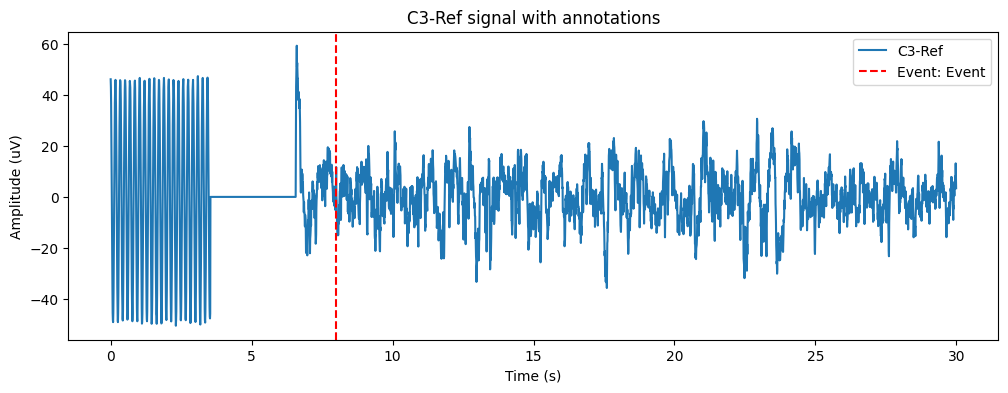

In [15]:
import os
import mne
import matplotlib.pyplot as plt

# Path to your dataset folder
DATA_PATH = "Drowsiness-Signal"

def load_trial(subject_trial):
    """
    Load signals and annotations for one subject's trial.
    
    subject_trial: e.g. "01M_1" (without extension)
    """
    signal_file = os.path.join(DATA_PATH, subject_trial + ".edf")
    ann_file = os.path.join(DATA_PATH, subject_trial + "_annotations.edf")
    
    # Load signals
    raw = mne.io.read_raw_edf(signal_file, preload=True, verbose=False)
    sfreq = raw.info["sfreq"]  # should be 128 Hz
    
    # Load annotations
    if os.path.exists(ann_file):
        ann = mne.read_annotations(ann_file)
        raw.set_annotations(ann)  # attach annotations to raw
    else:
        ann = None
    
    return raw, ann, sfreq

def plot_with_annotations(raw, ann, channel="C3-Ref", t_start=0, t_duration=30):
    """
    Plot EEG signal from one channel with annotation markers.
    
    channel: channel name (default = "C3-Ref")
    t_start: start time in seconds
    t_duration: duration of window in seconds
    """
    sfreq = raw.info["sfreq"]
    ch_idx = raw.ch_names.index(channel)
    
    # Extract data segment
    start_sample = int(t_start * sfreq)
    stop_sample = int((t_start + t_duration) * sfreq)
    data, times = raw[ch_idx, start_sample:stop_sample]
    
    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(times, data[0], label=channel)
    
    # Overlay annotations if present
    if ann is not None:
        for onset, duration, desc in zip(ann.onset, ann.duration, ann.description):
            if t_start <= onset <= t_start + t_duration:
                plt.axvline(onset, color="r", linestyle="--", label=f"Event: {desc}")
    
    plt.title(f"{channel} signal with annotations")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (uV)")
    plt.legend()
    plt.show()

# Example usage
raw, ann, sfreq = load_trial("01M_1")
print("Channels:", raw.ch_names)
print("Sampling rate:", sfreq)
print("Annotations:", ann)

# Plot first 30 seconds of C3-Ref channel
plot_with_annotations(raw, ann, channel="C3-Ref", t_start=0, t_duration=30)


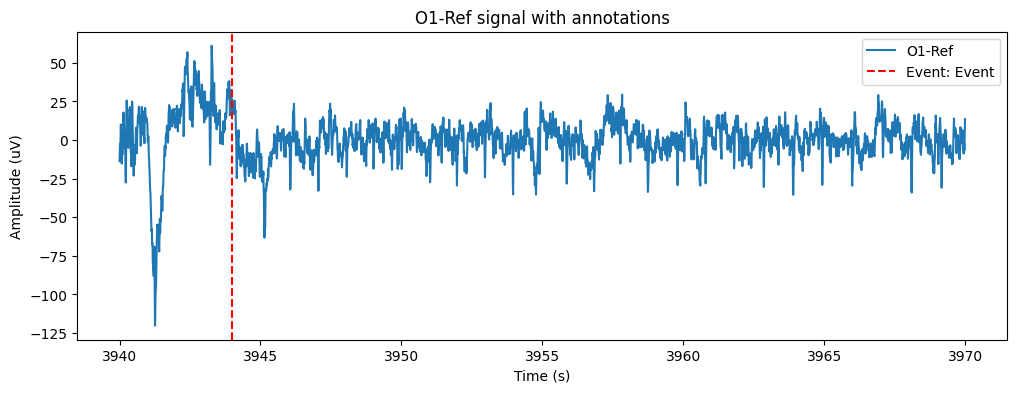

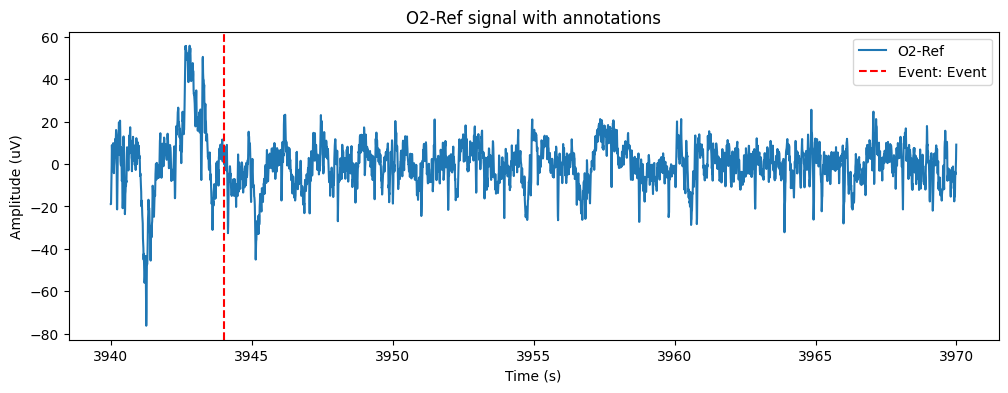

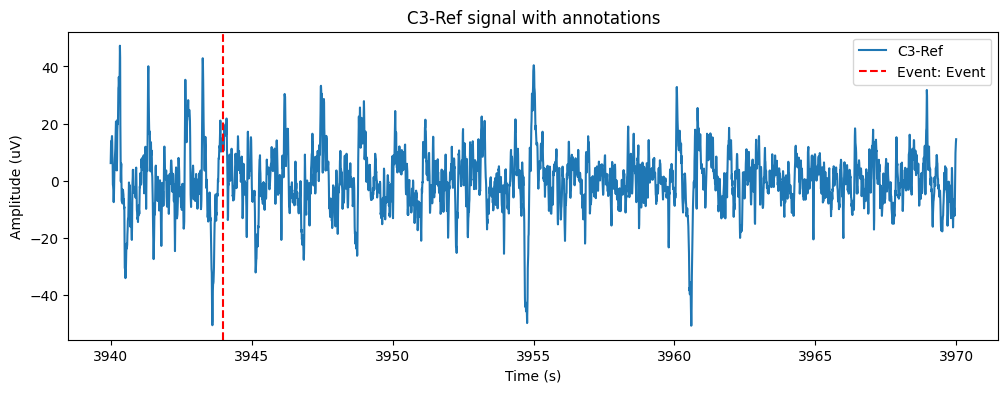

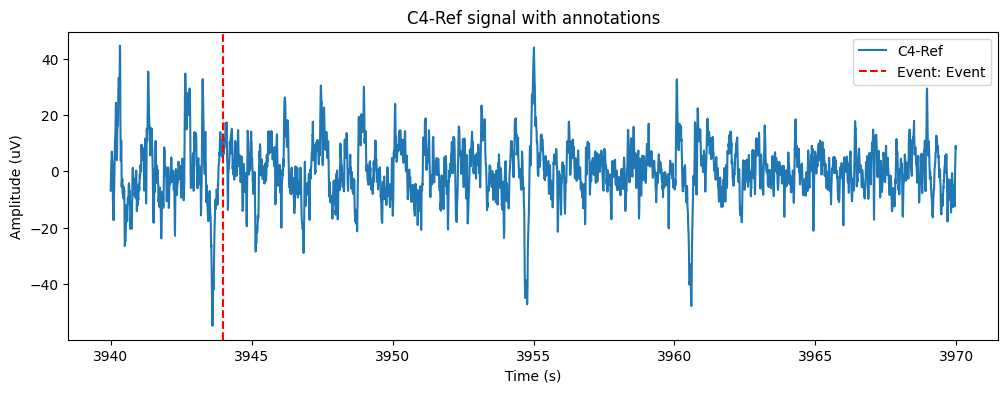

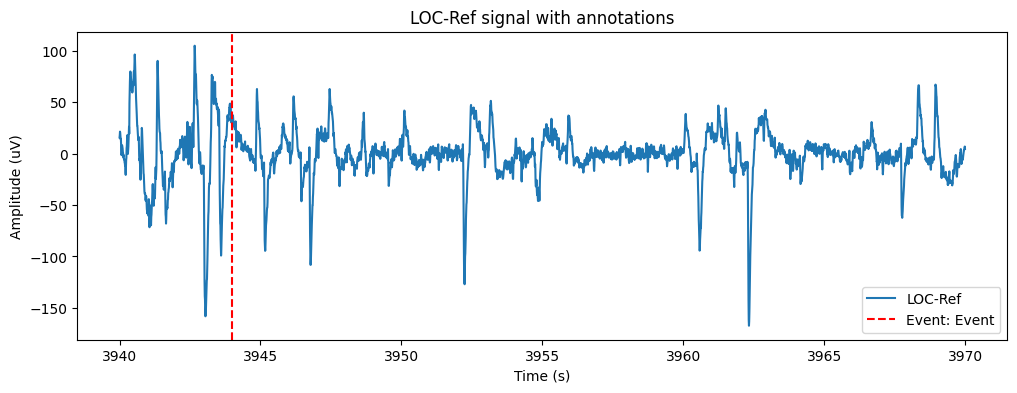

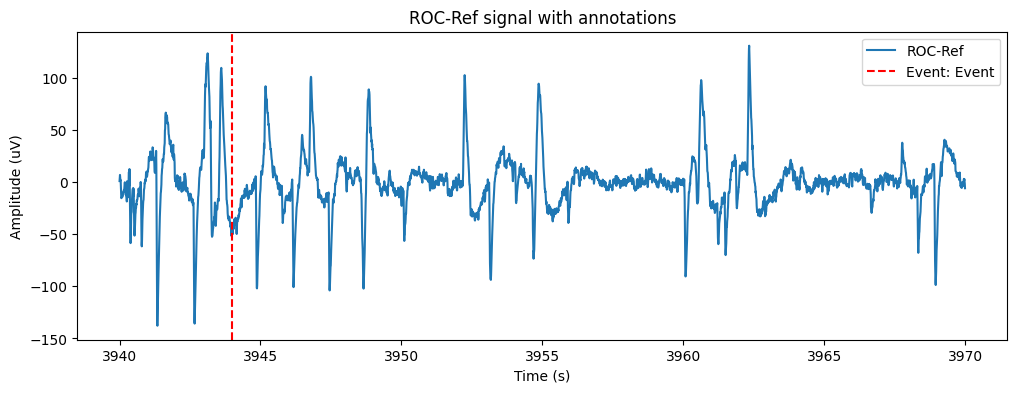

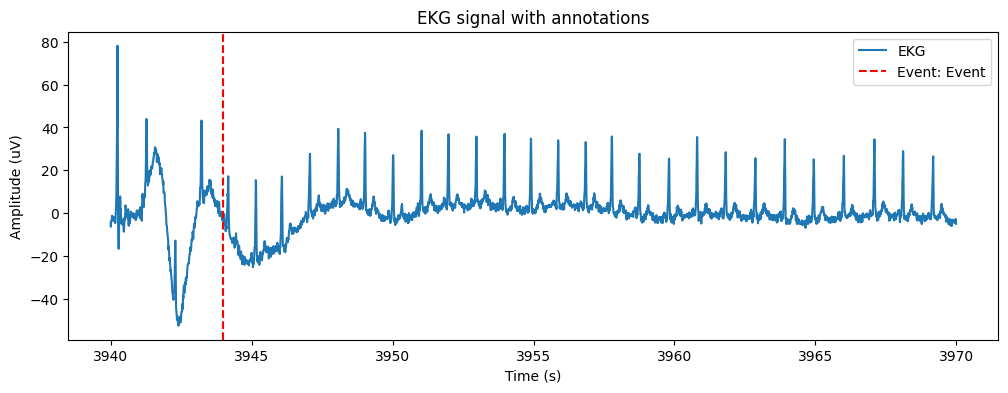

In [22]:
# Load one trial
raw, ann, sfreq = load_trial("01M_1")

# Plot each channel for first 30 seconds
for ch in raw.ch_names:
    plot_with_annotations(raw, ann, channel=ch, t_start=3940, t_duration=30)


In [ ]:
import os
import mne
import h5py
import numpy as np
import pandas as pd

# Path to folder containing your EDF files
DATA_PATH = "C:\Users\User\Desktop\ILP-PROJECT\Drowsiness-Signal"  

# Function to load signal edf
def load_signal(file_path):
    raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
    return raw

# Function to load annotations edf
def load_annotations(file_path):
    ann = mne.read_annotations(file_path)
    return ann

# Function to save into HDF5 for faster future access
def save_to_hdf5(subject_id, trial_id, raw, ann, save_path="processed_data.h5"):
    with h5py.File(save_path, "a") as f:
        group_name = f"{subject_id}_trial{trial_id}"
        if group_name in f:
            del f[group_name]   # overwrite if already exists
        grp = f.create_group(group_name)
        
        # Save raw signals (channels x samples)
        data, times = raw.get_data(return_times=True)
        grp.create_dataset("signals", data=data, compression="gzip")
        grp.create_dataset("times", data=times, compression="gzip")
        
        # Save channel info
        grp.attrs["ch_names"] = raw.ch_names
        grp.attrs["sfreq"] = raw.info["sfreq"]
        
        # Save annotations (button presses)
        if ann is not None:
            onset = np.array([a["onset"] for a in ann])
            duration = np.array([a["duration"] for a in ann])
            desc = np.array([a["description"] for a in ann], dtype="S")
            grp.create_dataset("annotations/onset", data=onset)
            grp.create_dataset("annotations/duration", data=duration)
            grp.create_dataset("annotations/description", data=desc)
        print(f"✅ Saved {group_name} to HDF5")

# Example loop over all your files
edf_files = sorted([f for f in os.listdir(DATA_PATH) if f.endswith(".edf")])

for f in edf_files:
    file_path = os.path.join(DATA_PATH, f)
    
    # Parse subject ID and trial
    parts = f.split("_")
    subject_id = parts[0]   # e.g., '01M'
    trial_id = parts[1].split(".")[0]  # e.g., '1' or '2'
    
    if "annotations" in f.lower():
        ann = load_annotations(file_path)
        # Store later after we load the matching signal
        continue
    else:
        raw = load_signal(file_path)
        # Find matching annotation file
        ann_file = f.replace(".edf", "_annotations.edf")
        ann_path = os.path.join(DATA_PATH, ann_file)
        if os.path.exists(ann_path):
            ann = load_annotations(ann_path)
            raw.set_annotations(ann)
        else:
            ann = None
        
        # Save to HDF5
        save_to_hdf5(subject_id, trial_id, raw, ann, save_path="processed_data.h5")
